# Matplotlib plotting Master Notebook

El objetivo de este notebook es recopilar gráficos realizados con la librería matplotlib y el paso a paso bien documentado para replicarlo con cualquier tipo de datos y poder reciclar código.

Adicionalmente, se incluye descripción de cada tipo de visualización para su utilización.

__Nota__: Esta notebook surge de la necesidad personal de reforzar el uso de visualizaciones, gran parte de las visualiaciones no son originalmente hechas por mi sino que son recopilados desde distintas fuentes.

El objetivo es tener un recurso en español, comentado línea a línea.

A continuación, listo los recursos utilizados:

__Plotting with Python: learn 80 plots STEP by STEP__ 

- https://www.kaggle.com/python10pm/plotting-with-python-learn-80-plots-step-by-step/log

__Top 50 matplotlib visualizations__ 

- https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

## Un gráfico efectivo:
### - Transmite la información correcta y necesaria sin distorsionar los hechos.
### - De diseño simple, no tienes que esforzarte para conseguirlo.
### - No sobrecargado de información.

In [1]:
# Main imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from IPython.display import Image

### Understanding the basics of matplotlib

#### figure, subplots, and axes:

![title](image1.png)


The figure is basically the canvas or a box where we can store all our plots/charts. It is the highest hierarchy.

The next in the row is the axes. Axes basically means the composition where our plot will live.

Axes is not the same as axis. Actually every axes contains __x__ axis an __y__ axis.

In matplotlib, you can do different plots with different methodologies. Doing the exact same plot can be achieved in multiple ways. We will use the __OOP approach of plotting in matplotlib__.

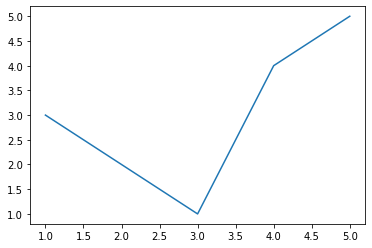

In [2]:
# Crear figura
fig = plt.figure()

# agregar subplot de forma explicita

ax1 = fig.add_subplot(1, 1, 1) # 1 axes en 1 row 1 columna.

# datos
x = [1, 2, 3, 4, 5]
y = [3, 2, 1, 4, 5]

# graficar
ax1.plot(x, y)

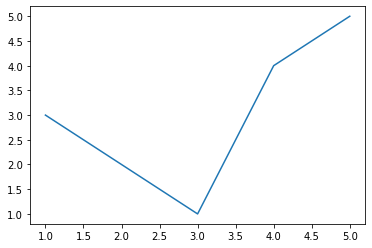

In [3]:
# podemos realizar el mismo gráfico de la siguiente forma
fig = plt.figure()
ax1 = fig.subplots()
ax1.plot(x,y)

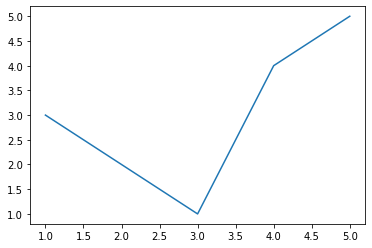

In [4]:
# Podemos simplificar más
plt.plot(x, y)

Puede parecer una pérdida de tiempo escribir 3 líneas en vez de 1 para llegar al mismo resultado, la mayoría de las veces podemos usar solo __plt.plot(x,y)__ para hacer gráficos simples. Sin embargo, la forma explicita (1) nos permitirá reutilizar más código con más frecuencia y añade más control sobre el gráfico.

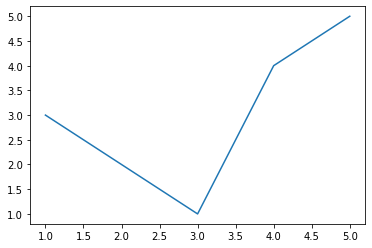

In [5]:
# Podemos llegar al mismo resultado aun de más maneras
ax1 = plt.axes()
ax1.plot(x, y)

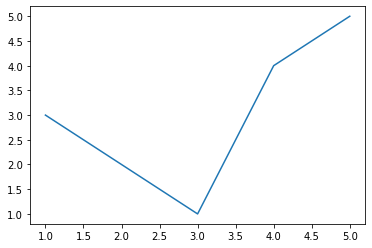

In [6]:
# usando plt.subplot
ax1 = plt.subplot() # distinto de subplots
ax1.plot(x,y)

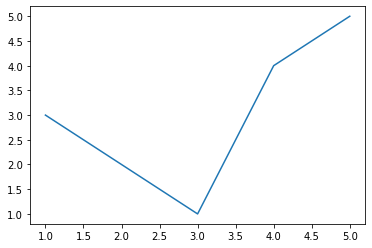

In [7]:
# usando add_axes()

# creamos figura
fig = plt.figure()

# agregamos axes
fig.add_axes()

# gca es "get current axes", ya que matplotlib plotea en los axes actuales
ax1 = plt.gca()

# plot
ax1.plot(x, y)

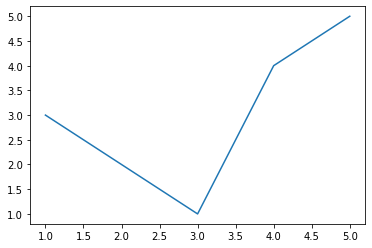

In [8]:
# o podemos usar simplemente axes()
ax1 = plt.axes()
ax1.plot(x, y)

#### Hay muchas maneras de realizar la misma tarea debido a la arquitectura de matplotlib.

![title](image2.png)

- 1. El nivel más bajo es __back end layer__ Por ejemplo, en Jupyter notebooks podemos usar __%matplotlib inline__ que ordena al back end layer renderizar los gráficos sin necesidad de llamar __plt.show()__. También se puede usar el back end layer para especificar que motor usar para renderizar (hvplot, jshtml). Es una de las pocas ocasiones en la que se interactúa con este nivel.


 - 2. __Artist Layer__, nos da la posibilidad de realizar cambios en el gráfico (colores, ejes, etc). Podemos acceder a esta capa cuando llamamos __ax1.plot()__. Cuando realizamos gráficos de esta forma, estamos usando el método __OOP__.
 
 
 - 3. La última capa es muy util para gráficos rápidos. La utilizamos por ejemplo, llamando __plt.plot()__.
 
 Como podemos ver, dependiendo del estilo que ocupemos, estaremos usando distintas capas y esto impacta en la forma de hacer las cosas.
 
 Todos estos métodos producen el mismo resultado cuando creamos un solo gráfico, al generar varios gráficos simultaneamente la metodología cambia.

Por ejemplo, queremos 4 gráficos en formato 2 x 2:

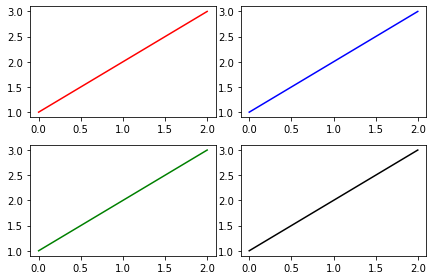

In [9]:
# Creamos figura
fig = plt.figure()

# Creamos 4 gráficos usando tuple unpacking para nombrar a cada uno

(ax1, ax2), (ax3, ax4) = fig.subplots(2,2)

ax1.plot([1,2,3], color = 'r')
ax2.plot([1,2,3], color = 'b')
ax3.plot([1,2,3], color = 'g')
ax4.plot([1,2,3], color = 'black')

plt.tight_layout()

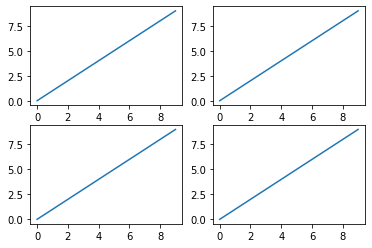

In [10]:
# Podemos hacer lo mismo utilizando un for loop

nrows = 2
ncols = 2

fig, axes = plt.subplots(nrows, ncols)

# los axes son una tupla como vimos en la forma anterior

for row in range(nrows):
    for column in range(ncols):
        ax = axes[row, column]
        ax.plot(np.arange(10))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


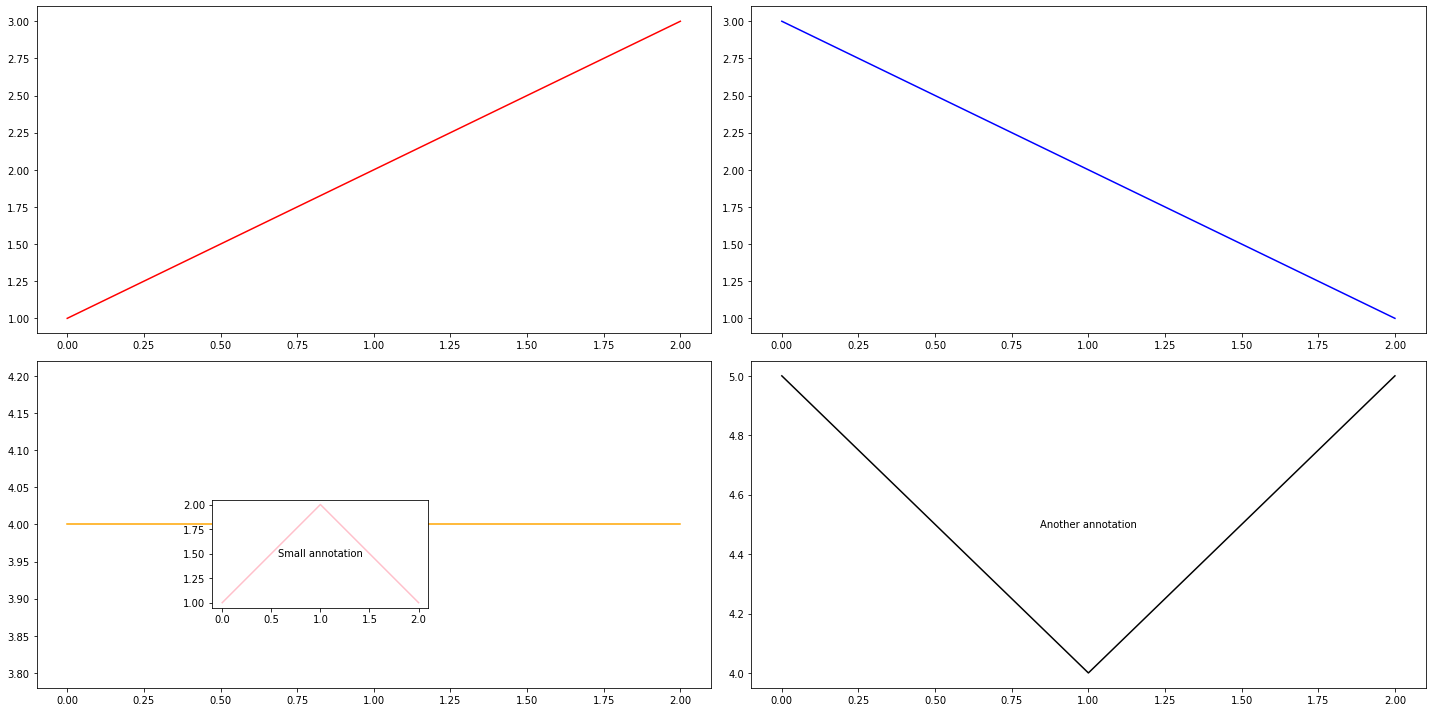

In [11]:
# Un ejemplo más loco

# Creamos figura
fig = plt.figure(figsize = (20, 10))

# Creamos 4 gráficos y usamos unpacking de tuplas para nombrarlos
(ax1, ax2), (ax3, ax4) = fig.subplots(2, 2)

# ax1
ax1.plot([1, 2, 3], color = 'r')

# ax2
ax2.plot([3,2,1], color = 'b')

# ax3
ax3.plot([4, 4, 4], color = 'orange')

ax3_bis = fig.add_axes([0.15, 0.15, 0.15, 0.15])
ax3_bis.plot([1, 2, 1], color = 'pink')

# annotation
ax3_bis.annotate("Small annotation",
                xy = (0.5, 0.5),
                xycoords = 'axes fraction',
                va = 'center',
                ha = 'center')

# ax4
ax4.plot([5, 4, 5], color = 'black')

ax4.annotate('Another annotation',
            xy = (0.5, 0.5), # fracción de ax4, la ponemos en el centro
            xycoords = 'axes fraction', # nosotros podemos especificar los datos  de x e y
            va = 'center',
            ha = 'center')

plt.tight_layout()

# Importamos datos

In [12]:
path = "https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv"

data = pd.read_csv(path)
data.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


## 1. Scatter plot

Scatteplot es un gráfico clásico y fundamental que se utiliza para estudiar la relación entre dos variables. Si tiene varios grupos en sus datos, es posible que desee visualizar cada grupo en un color diferente. En matplotlib, puede hacer esto convenientemente usando plt.scatterplot ().

Más info: https://en.wikipedia.org/wiki/Scatter_plot

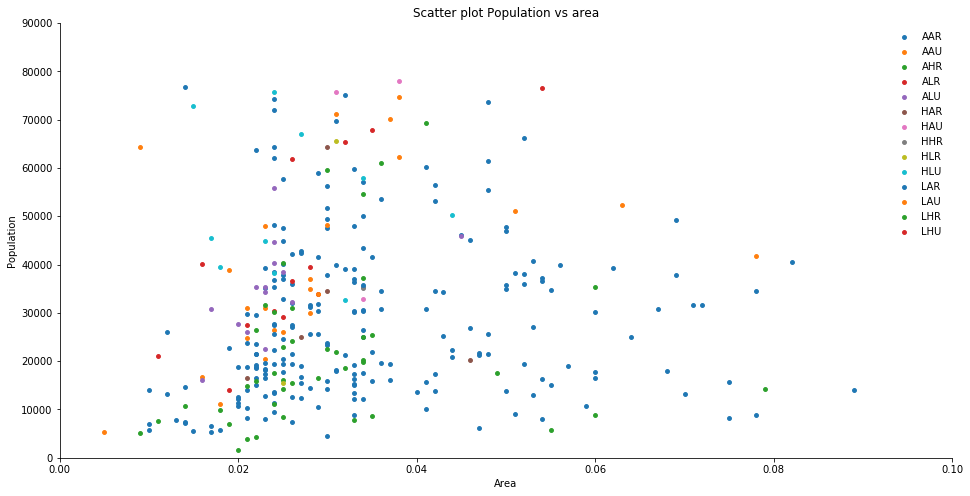

In [65]:
# Visualiza relación entre los datos

# Instanciamos figura
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(1, 1, 1)

# iteramos sobre cada categoría de los datos. De esta manera, cada una tendrá su propio color.

for cat in sorted(list(data['category'].unique())):
    
    # filtramos el x e y para cada categoría
    ar = data[data['category']== cat]['area']
    pop = data[data['category']== cat]['poptotal']
    
    # plot
    ax.scatter(ar, pop, label = cat, s = 15) # s --> size 
    
# Le damos más estética al mapa

# Eliminamos 2/4 bordes 
ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")

# Agregamos etiqueta a cada ax
ax.set_xlabel('Area') # Nombre de eje X 
ax.set_ylabel('Population') # Nombre de eje Y

# cambiamos los límites del gráfico, esto nos permitirá ver la leyenda al lado izquierdo
ax.set_ylim(0, 90000) # Limites eje Y
ax.set_xlim(0, 0.1) # Limites eje X
ax.set_title('Scatter plot Population vs area') # Titulo
ax.legend(loc = 'upper right', fontsize = 10, frameon=False) # Podemos sacarle el "Frame"

## 2. Bubble plot

Cada punto de este tipo de gráfico tiene un tamaño definido por los datos

https://en.wikipedia.org/wiki/Scatter_plot

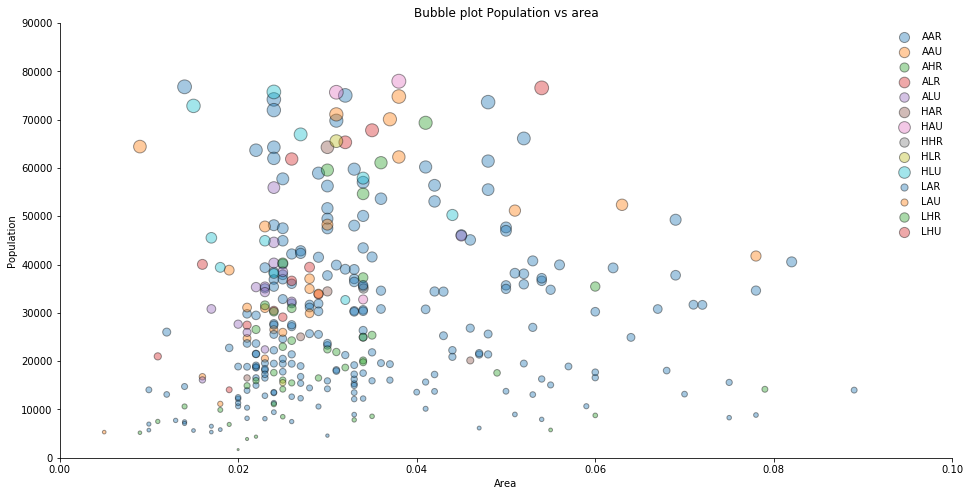

In [66]:
# Instanciamos la figura
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) # Con esto ya tenemos la figura

# Preparamos datos
# En este caso necesitamos el total de la columna de población, la cual es la métrica que vamos a medir
size_total = data['poptotal'].sum()

# Iteramos por todas las categoria, asignandole un color y marcador a cada una:
for cat in sorted(data['category'].unique()):
    
    # filtramos el x e y para cada categoría
    ar = data[data['category']== cat]['area']
    pop = data[data['category']== cat]['poptotal']
    
    # Aqui calculamos el tamaño especifico de cata categoria, esta es la clave de este gráfico
    size = pop/size_total # Mientras más grande esta proporción, más grande será el marcador
    
    # Gráficamos, especificando 's = size' y 'marker = marker'
    # 'alpha' es la opacidad de los puntos [0,1], siendo 1 el predeterminado
    # Se puede experimentar con el tipo de marker
    
    ax.scatter(ar, pop, label = cat, s = size*100000, marker = '.', 
               alpha = 0.4, # opacidad
              edgecolors = 'black') # color de los bordes de cada punto
    
# Styling
# Eliminar spines
ax.spines['top'].set_color('None')
ax.spines['right'].set_color('None')

# Axis Labels
ax.set_xlabel("Area")
ax.set_ylabel("Population")

# Limites de cada eje
ax.set_ylim(0, 90000) # Limites eje Y
ax.set_xlim(0, 0.1) # Limites eje X

# Titulo
ax.set_title('Bubble plot Population vs area') # Titulo

# Leyenda, sin marco --> podemo eliminar ese argumento o simplemente asignarle True en el caso que eramos marco
ax.legend(loc = 'upper right', fontsize = 10, frameon=False) # Podemos sacarle el "Frame"

## 3. Bubble plot with encircling

A veces, desea mostrar un grupo de puntos dentro de un límite para enfatizar su importancia

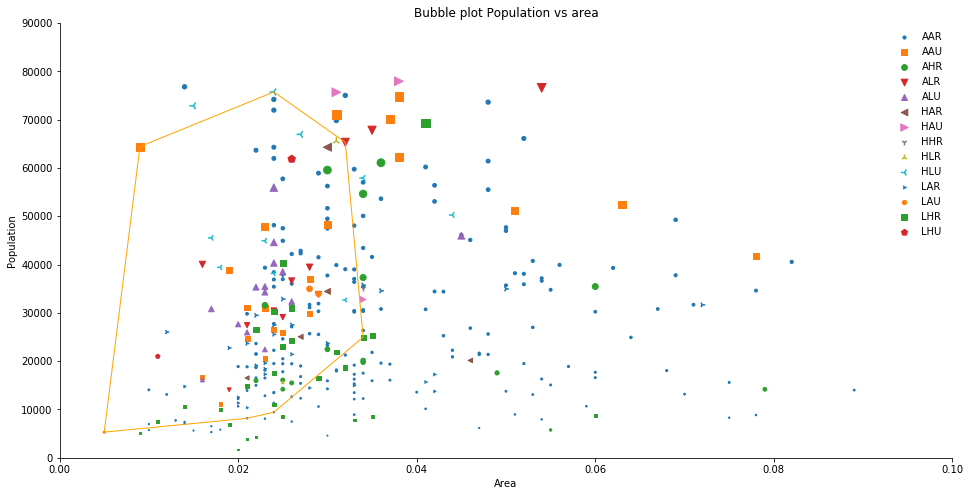

In [67]:
# Necesitamos importar la clase Convexhull para el encircling
from scipy.spatial import ConvexHull

# Instanciamos la figura
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) # Con esto ya tenemos la figura

# Preparamos datos
# En este caso necesitamos el total de la columna de población, la cual es la métrica que vamos a medir
size_total = data['poptotal'].sum()

# Queremos que cada grupo tenga un marcador distinto
markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", 
           "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d"] 

# Iteramos por todas las categoria, asignandole un color y marcador a cada una:
for cat, marker in zip(sorted(data['category'].unique()), markers):
    
    # filtramos el x e y para cada categoría
    ar = data[data['category']== cat]['area']
    pop = data[data['category']== cat]['poptotal']
    
    # Aqui calculamos el tamaño especifico de cata categoria
    size = pop/size_total # Mientras más grande esta proporción, más grande será el marcador
    
    # Gráficamos, especificando 's = size' y 'marker = marker' 
    ax.scatter(ar, pop, label = cat, s = size*10000, marker = marker) # No es necesario que los markers sean tan locos

# A continuación, procedemos con enfatizar datos usando el encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot

# 1. Filtrar grupo que queremos enfatizar, en este caso 'IN'
encircle_data = data[data['state']=='IN']

# 2. Obtenemos X e Y
encircle_x = encircle_data['area']
encircle_y = encircle_data['poptotal']

# 3. np.c_ concatena sobre el segundo eje
p = np.c_[encircle_x,encircle_y]

# 4. ConvexHull que importamos anteriormente, calcula los limites de un polígono
hull = ConvexHull(p)

# 5. Creamos un poligono con un color especifico con los datos de hull
poly = plt.Polygon(p[hull.vertices,:], ec = 'orange', fc = 'none')

# agregamos al gráfico
ax.add_patch(poly)

# Styling
# Eliminar spines
ax.spines['top'].set_color('None')
ax.spines['right'].set_color('None')

# Axis Labels
ax.set_xlabel("Area")
ax.set_ylabel("Population")

# Limites de cada eje
ax.set_ylim(0, 90000) # Limites eje Y
ax.set_xlim(0, 0.1) # Limites eje X

# Titulo
ax.set_title('Bubble plot Population vs area') # Titulo

# Leyenda, sin marco --> podemo eliminar ese argumento o simplemente asignarle True en el caso que eramos marco
ax.legend(loc = 'upper right', fontsize = 10, frameon=False) # Podemos sacarle el "Frame"

#### Otro tipo de encircling:

El proceso es muy similar al gráfico anterior

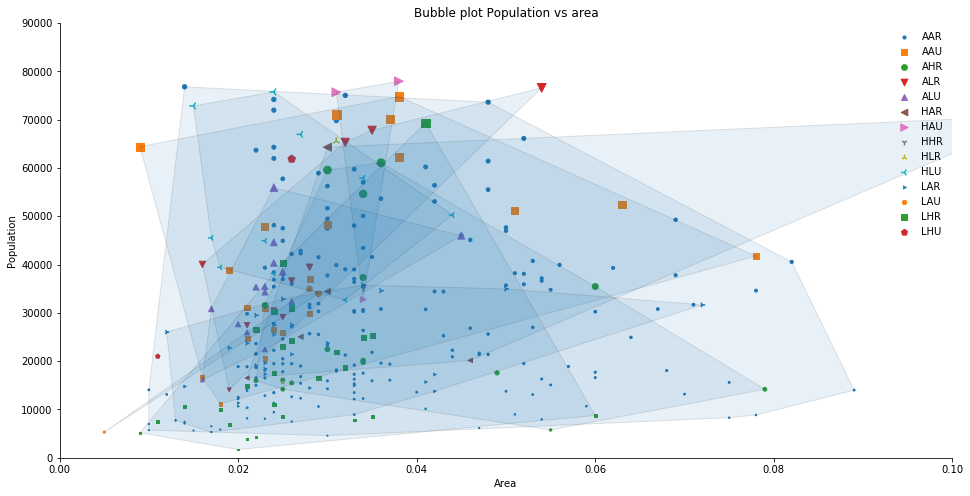

In [68]:
# Instanciamos la figura
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) # Con esto ya tenemos la figura

# Preparamos datos
# En este caso necesitamos el total de la columna de población, la cual es la métrica que vamos a medir
size_total = data['poptotal'].sum()

# Queremos que cada grupo tenga un marcador distinto
markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", 
           "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d"]

# En este caso crearemos una función que hará el encircling:
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw)
def encircle(x, y, ax = None, **kw):
    """ Toma los ejes, X e Y y dibuja los poligonos"""
    """Este codigo separa los diferente clusters"""
    
    # Si no entregamos el axis, lo obtenemos con 'gca' (get current axis)
    if not ax:
        ax = plt.gca()
    
    # Concatenamos X e Y
    p = np.c_[x, y]
    
    # Calculamos limites del polígono
    hull = ConvexHull(p)
    
    # Creamos polígono desde los vertices
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    
    # agregamos
    ax.add_patch(poly)

# Iteramos por todas las categoria, asignandole un color y marcador a cada una:
for cat, marker in zip(sorted(data['category'].unique()), markers):
    
    # filtramos el x e y para cada categoría
    ar = data[data['category']== cat]['area']
    pop = data[data['category']== cat]['poptotal']
    
    # Aqui calculamos el tamaño especifico de cata categoria
    size = pop/size_total # Mientras más grande esta proporción, más grande será el marcador
    
    # Gráficamos, especificando 's = size' y 'marker = marker' 
    ax.scatter(ar, pop, label = cat, s = size*10000, marker = marker)
    
    # Agregamos el encircling en cada iteración
    try:
        # try to add a patch
        encircle(ar, pop, ec = "k", alpha=0.1)
    except:
        # if we don't have enough poins to encircle just pass
        pass

# Styling
# Eliminar spines
ax.spines['top'].set_color('None')
ax.spines['right'].set_color('None')

# Axis Labels
ax.set_xlabel("Area")
ax.set_ylabel("Population")

# Limites de cada eje
ax.set_ylim(0, 90000) # Limites eje Y
ax.set_xlim(0, 0.1) # Limites eje X

# Titulo
ax.set_title('Bubble plot Population vs area') # Titulo

# Leyenda, sin marco --> podemo eliminar ese argumento o simplemente asignarle True en el caso que eramos marco
ax.legend(loc = 'upper right', fontsize = 10, frameon=False) # Podemos sacarle el "Frame"

## Scatter plot con linea de regresión o "Best fit"

Si se desea comprender como cambian dos variables entre sí, la línea de mejor ajuste o 'best fit' es la mejor opción.

El siguiente gráfico muestra cómo la línea de mejor ajuste difiere entre varios grupos en los datos. Para deshabilitar las agrupaciones y solo dibujar una línea de mejor ajuste para todo el conjunto de datos, elimine el parámetro hue = 'cyl' de la llamada sns.lmplot () a continuación.

https://visual.ly/m/scatter-plots-regression-lines/

Text(0.5, 1, 'Scatter plot con línea de Best Fit')

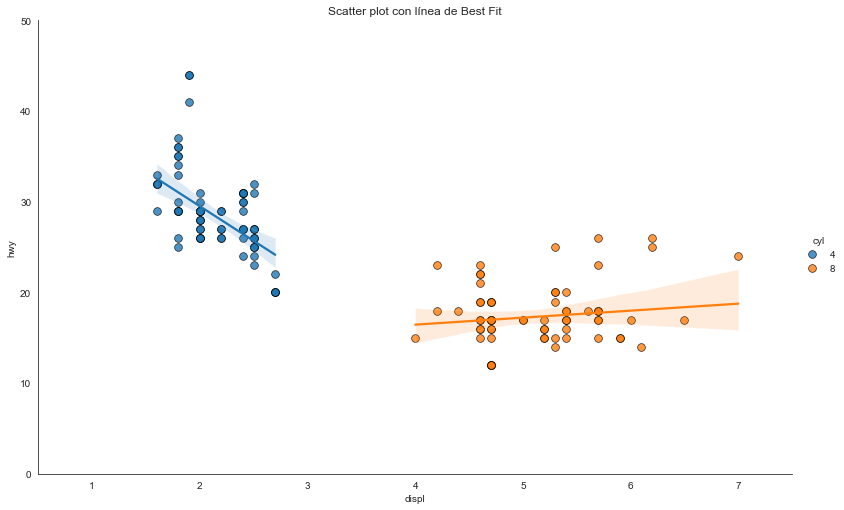

In [88]:
# Importamos seaborn
import seaborn as sns 

# Importamos datos
data = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
#seleccionamos datos
datos = data.loc[data['cyl'].isin([4,8]), :]

# Gráficamos usando seaborn
# Podemos omitir poner x = 'displ', podriamos colocar simplemente 'displ'
sns.lmplot(x = 'displ', y = 'hwy', data = datos, hue = 'cyl', 
          height=7, aspect=1.6, robust=True, palette='tab10',
          scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Seaborn utiliza matplotlib para sus visualizaciones, por los que podemos utilizar plt.gca y todos sus comandos
# Obtenemos ax actual en el que queremos trabajar
ax = plt.gca()

# cambiamos límites
ax.set_xlim(0.5, 7.5)
ax.set_ylim(0, 50)

# Título
ax.set_title('Scatter plot con línea de Best Fit')

Realizamos el mismo gráfico, pero separamos cada uno en distintos axes

Text(0.5, 1, 'Scatter plot con línea de Best Fit')

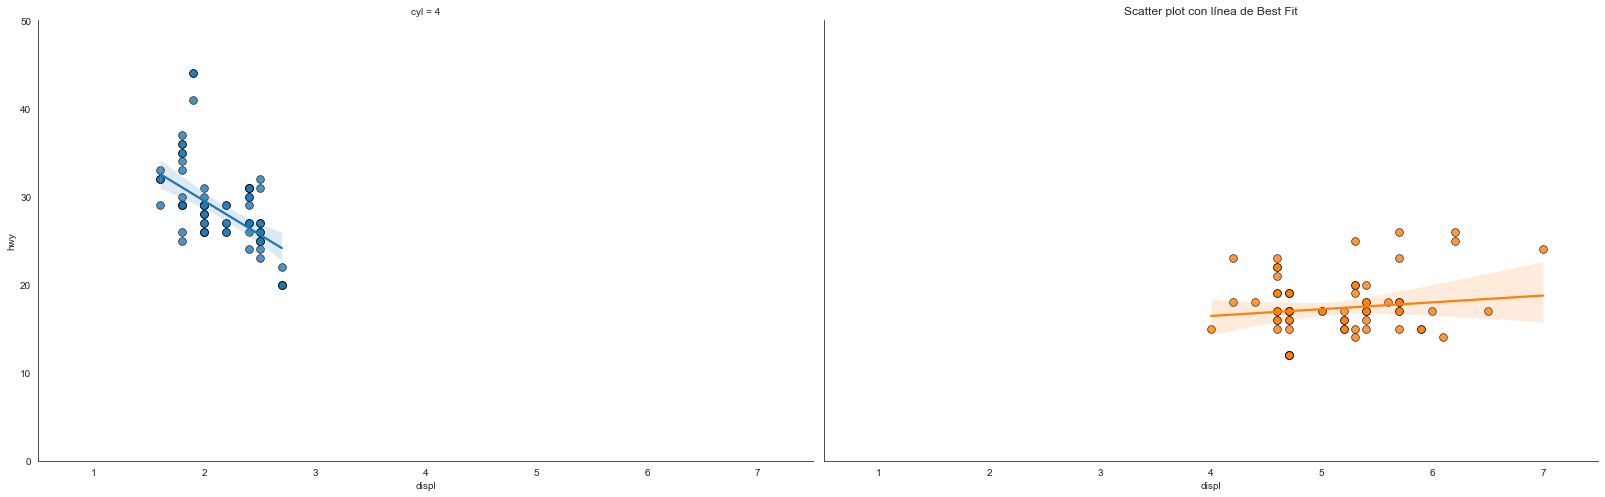

In [91]:
# Los datos ya están declarados en el gráfico anterior

# Gráficamos usando seaborn
# Podemos omitir poner x = 'displ', podriamos colocar simplemente 'displ'
# Especificando 'col' seaborn crea un gráfico por axes
axes = sns.lmplot(x = 'displ', y = 'hwy', data = datos, hue = 'cyl', col = 'cyl', 
                  height=7, aspect=1.6, robust=True, palette='tab10',
                  scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Seaborn utiliza matplotlib para sus visualizaciones, por los que podemos utilizar plt.gca y todos sus comandos
# Obtenemos ax actual en el que queremos trabajar
ax = plt.gca()

# cambiamos límites
ax.set_xlim(0.5, 7.5)
ax.set_ylim(0, 50)

# Título
ax.set_title('Scatter plot con línea de Best Fit')